In [0]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

(-1, 1)

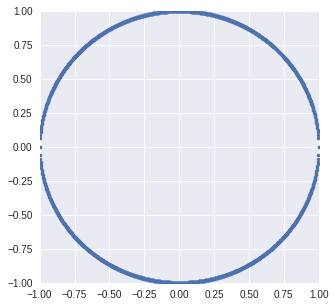

In [2]:
#generate points on a unit circle

xs = np.linspace(-1, 1, 1000)
ys = np.sqrt(1-xs**2)

xs = np.append(xs, xs)
ys = np.append(ys, -ys)

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(xs,ys,'.')

plt.xlim([-1,1])
plt.ylim([-1,1])

(-5, 5)

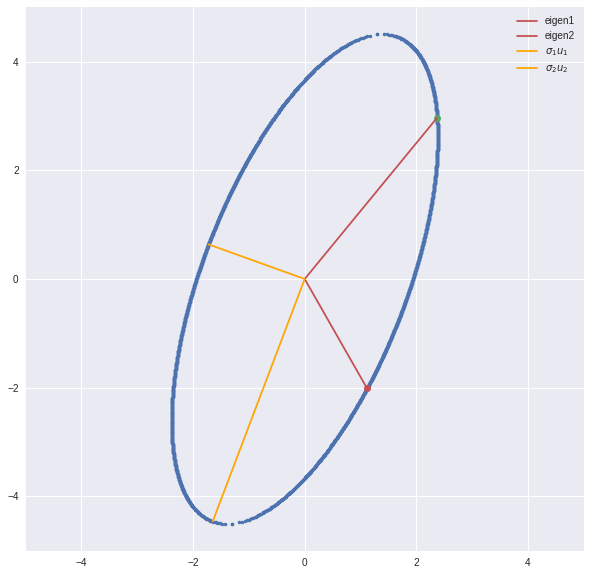

In [5]:
#map the circle via the matrix A
A = np.array([[1.3,2], [4.5, 0.2]])
eigenval, eigenvec = np.linalg.eig(A)

mapped=[]
for x,y in zip(xs,ys):
    mapped.append(np.dot(A,np.array([x, y])))
fig, ax = plt.subplots(1,1,figsize=(10,10))
newx = [item[0] for item in mapped]
newy = [item[1] for item in mapped]
ax.plot(newx, newy, '.')


#plot eigenvectors
eign_x1 = eigenval[0]*eigenvec[0,0]
eign_y1 = eigenval[0]*eigenvec[1,0]
eign_x2 = eigenval[1]*eigenvec[0,1]
eign_y2 =  eigenval[1]*eigenvec[1,1]

ax.plot(eign_x1, eign_y1, 'o')
ax.plot(eign_x2, eign_y2, 'o')


line1 = plt.Line2D([0,eign_x1], [0,eign_y1], color='r', label='eigen1')
ax.add_line(line1)
line2 = plt.Line2D([0,eign_x2], [0,eign_y2], color='r', label='eigen2')
ax.add_line(line2)


#SVD stuff
U, s, V = np.linalg.svd(A)
line3 = plt.Line2D([0,s[0]*U[0,0]], [0,s[0]*U[1,0]], color='orange', label='$\sigma_1u_1$')
ax.add_line(line3)
line4 = plt.Line2D([0,s[1]*U[0,1]], [0,s[1]*U[1,1]], color='orange', label='$\sigma_2u_2$')
ax.add_line(line4)


plt.legend(handles=[line1, line2, line3, line4], loc=1)
plt.xlim([-5,5])
plt.ylim([-5,5])

In [6]:
A

array([[1.3, 2. ],
       [4.5, 0.2]])

In [8]:
eigenval, eigenvec = np.linalg.eig(A)
print (eigenval)
print (eigenvec)

[ 3.8 -2.3]
[[ 0.62469505 -0.48564293]
 [ 0.78086881  0.87415728]]


In [9]:
np.dot(np.dot(eigenvec, np.diag(eigenval)), np.linalg.inv(eigenvec))

array([[1.3, 2. ],
       [4.5, 0.2]])

In [10]:
eigenval, eigenvec = np.linalg.eig(np.dot(np.transpose(A),A))
print (eigenval)
print (eigenvec)

[22.60002081  3.37997919]
[[ 0.98267989 -0.18531119]
 [ 0.18531119  0.98267989]]


In [0]:
V = np.transpose(eigenvec)
S = np.sqrt(np.diag(eigenval))
U = np.dot(np.dot(A, np.transpose(V)), np.linalg.inv(S))

In [12]:
np.dot(np.dot(U, S), V)

array([[1.3, 2. ],
       [4.5, 0.2]])

In [13]:
A

array([[1.3, 2. ],
       [4.5, 0.2]])

[[4.75394792 0.        ]
 [0.         1.83847197]]
[[ 0.34668159  0.93798287]
 [ 0.93798287 -0.34668159]]


(-5, 5)

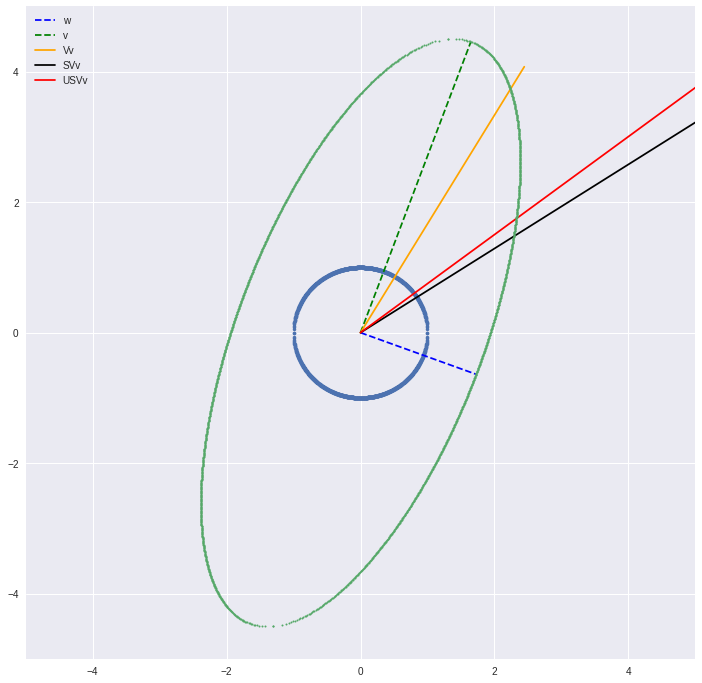

In [15]:
fig, ax = plt.subplots(1,1,figsize=(12,12))

ax.plot(xs,ys,'.')

v = np.array(S[0,0]*U[:, 0])


print (S)

print (U)



w = np.array(S[1,1]*U[:, 1])
line11 = plt.Line2D([0,w[0]], [0,w[1]], linestyle='--', color='blue', label='w')
ax.add_line(line11)

line1 = plt.Line2D([0,v[0]], [0,v[1]], linestyle='--', color='green', label='v')
ax.add_line(line1)

Vv = np.dot(V, v)
line2 = plt.Line2D([0,Vv[0]], [0,Vv[1]], color='orange', label='Vv')
ax.add_line(line2)

SVv = np.dot(S, Vv)
line3 = plt.Line2D([0,SVv[0]], [0,SVv[1]], color='black', label='SVv')
ax.add_line(line3)

USVv = np.dot(U, SVv)
line4 = plt.Line2D([0,USVv[0]], [0,USVv[1]], color='red', label='USVv')
ax.add_line(line4)


newx = [item[0] for item in mapped]
newy = [item[1] for item in mapped]
ax.plot(newx, newy, '.', markersize=4)
plt.legend(handles=[line11, line1, line2, line3, line4], loc=2)

plt.xlim([-5,5])
plt.ylim([-5,5])

(-5, 5)

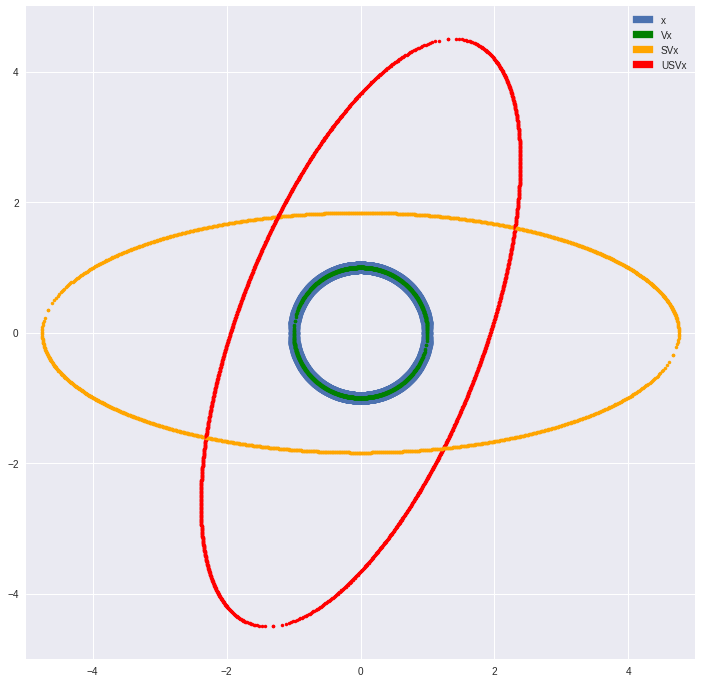

In [16]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1,1,figsize=(12,12))

ax.plot(xs,ys,'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

for x,y in zip(xs, ys):
    Vpoint = np.dot(V, [x,y])
    ax.plot(Vpoint[0], Vpoint[1], '.', color='green')
    SVpoint = np.dot(S, Vpoint)
    ax.plot(SVpoint[0], SVpoint[1], '.', color='orange')
    USVpoint = np.dot(U, SVpoint)
    ax.plot(USVpoint[0], USVpoint[1], '.', color='red')

blue = mpatches.Patch(color='b', label='x')    
green = mpatches.Patch(color='green', label='Vx')
orange = mpatches.Patch(color='orange', label='SVx')
red = mpatches.Patch(color='red', label='USVx')
plt.legend(handles=[blue, green, orange, red])
plt.xlim([-5,5])
plt.ylim([-5,5])